In [ ]:
# Name: Sanjeet Devkota

# Predict Breast Cancer

## Feed Forward Neural Network
# N * 128 * 64 * 32 * 16 * 1

# Evaluate Performance of Momentum, AdaGrad, RMSProb, and Adam optimizers in terms of accuracy and F1 Score.

In [ ]:
# Importing Libraries

import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Dense, Input
import tensorflow as tf
import keras.backend as K
from keras.optimizers import SGD, Adam, RMSprop, Adagrad

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [ ]:
# Loading Data
data = load_breast_cancer()
data.target.shape


(569,)

In [ ]:
# Train And  Test Split

X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.1, random_state=100)

In [ ]:
# Defining F1 Score Function

def get_f1(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

In [ ]:
# Creating Model

def get_model():
  model = Sequential()
  model.add(Input(30))
  model.add(Dense(128, activation='relu'))
  model.add(Dense(64, activation='relu'))
  model.add(Dense(32, activation='relu'))
  model.add(Dense(16, activation='relu'))
  model.add(Dense(1, activation='sigmoid'))
  return model

In [ ]:
# Adam Model

adam_model = get_model()
adam_model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=[get_f1, 'accuracy'])
adam_history = adam_model.fit(X_train, y_train, epochs=130, batch_size=30, validation_split=0.3, verbose=0)
K.clear_session()

In [ ]:
# SGD Model

sgd_model = get_model()
sgd_model.compile(loss='binary_crossentropy', optimizer=SGD(learning_rate=0.001, momentum=0.6), metrics=[get_f1, 'accuracy'])
sgd_history = sgd_model.fit(X_train, y_train, epochs=130, batch_size=30, validation_split=0.3, verbose=0)
K.clear_session()

In [ ]:
# RMSProb Optimizer Model

rmsprob_model = get_model()
rmsprob_model.compile(loss='binary_crossentropy', optimizer=RMSprop(learning_rate=0.001), metrics=[get_f1, 'accuracy'])
rmsprob_history = rmsprob_model.fit(X_train, y_train, epochs=130, batch_size=30, validation_split=0.3, verbose=0)
K.clear_session()

In [ ]:
# Adagrad Optimizer Model

adagrad_model = get_model()
adagrad_model.compile(loss='binary_crossentropy', optimizer=Adagrad(learning_rate=0.001), metrics=[get_f1, 'accuracy'])
adagrad_history = adagrad_model.fit(X_train, y_train, epochs=130, batch_size=30, validation_split=0.3, verbose=0)
K.clear_session()

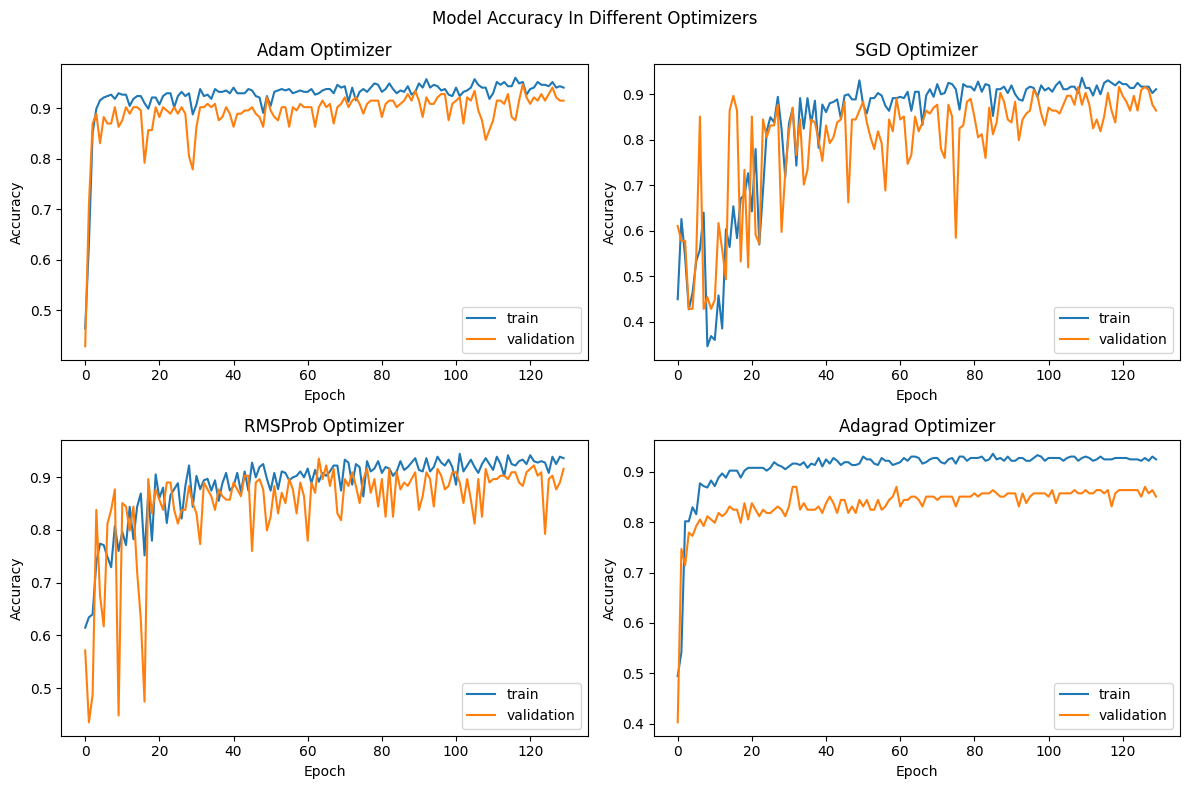

In [ ]:
def accuracy_plot():
  fig, axs = plt.subplots(2,2, figsize=(12, 8))
  fig.suptitle("Model Accuracy In Different Optimizers")

  axs[0,0].plot(adam_history.history['accuracy'])
  axs[0,0].plot(adam_history.history['val_accuracy'])
  axs[0,0].legend(['train', 'validation'], loc='lower right')
  axs[0,0].set_xlabel("Epoch")
  axs[0,0].set_ylabel("Accuracy")
  axs[0,0].set_title("Adam Optimizer")

  axs[0,1].plot(sgd_history.history['accuracy'])
  axs[0,1].plot(sgd_history.history['val_accuracy'])
  axs[0,1].legend(['train', 'validation'], loc='lower right')
  axs[0,1].set_xlabel("Epoch")
  axs[0,1].set_ylabel("Accuracy")
  axs[0,1].set_title("SGD Optimizer")

  axs[1,0].plot(rmsprob_history.history['accuracy'])
  axs[1,0].plot(rmsprob_history.history['val_accuracy'])
  axs[1,0].legend(['train', 'validation'], loc='lower right')
  axs[1,0].set_xlabel("Epoch")
  axs[1,0].set_ylabel("Accuracy")
  axs[1,0].set_title("RMSProb Optimizer")

  axs[1,1].plot(adagrad_history.history['accuracy'])
  axs[1,1].plot(adagrad_history.history['val_accuracy'])
  axs[1,1].legend(['train', 'validation'], loc='lower right')
  axs[1,1].set_xlabel("Epoch")
  axs[1,1].set_ylabel("Accuracy")
  axs[1,1].set_title("Adagrad Optimizer")

  fig.tight_layout()
  fig.show()


accuracy_plot()


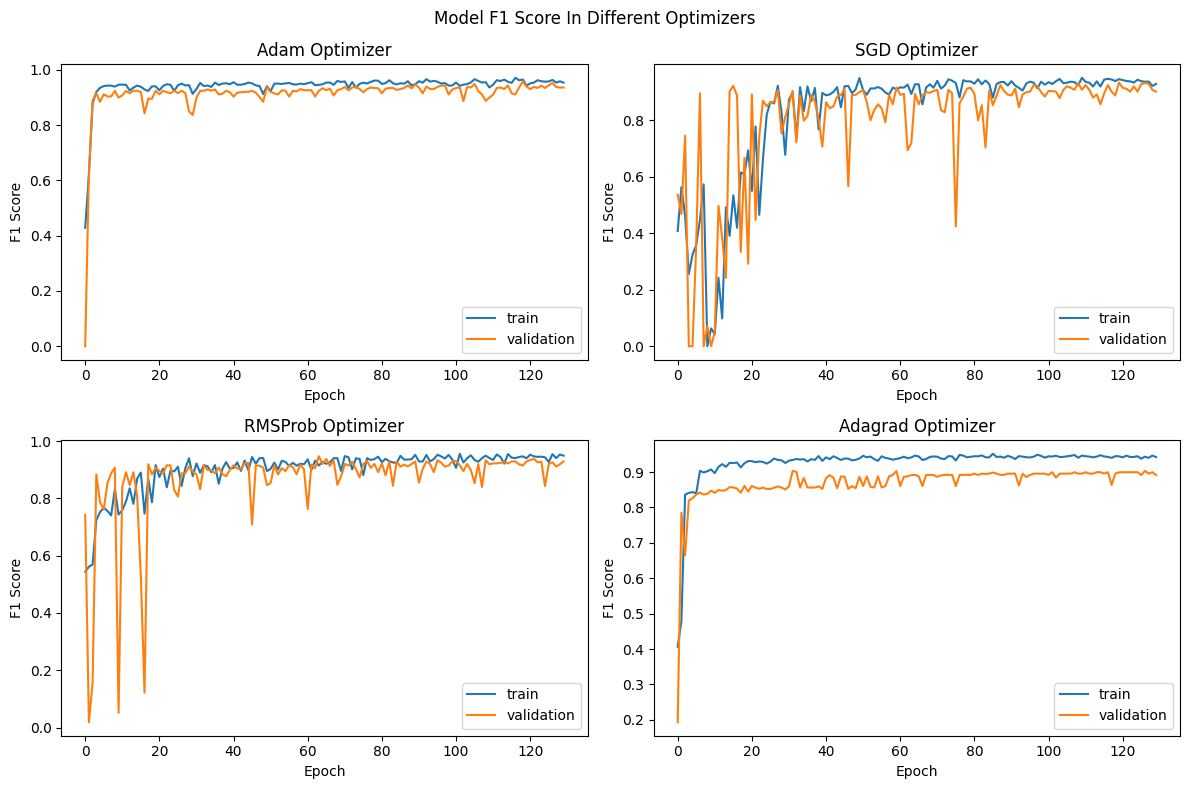

In [ ]:
def f1score_plot():
  fig, axs = plt.subplots(2,2, figsize=(12, 8))
  fig.suptitle("Model F1 Score In Different Optimizers")

  axs[0,0].plot(adam_history.history['get_f1'])
  axs[0,0].plot(adam_history.history['val_get_f1'])
  axs[0,0].legend(['train', 'validation'], loc='lower right')
  axs[0,0].set_xlabel("Epoch")
  axs[0,0].set_ylabel("F1 Score")
  axs[0,0].set_title("Adam Optimizer")

  axs[0,1].plot(sgd_history.history['get_f1'])
  axs[0,1].plot(sgd_history.history['val_get_f1'])
  axs[0,1].legend(['train', 'validation'], loc='lower right')
  axs[0,1].set_xlabel("Epoch")
  axs[0,1].set_ylabel("F1 Score")
  axs[0,1].set_title("SGD Optimizer")

  axs[1,0].plot(rmsprob_history.history['get_f1'])
  axs[1,0].plot(rmsprob_history.history['val_get_f1'])
  axs[1,0].legend(['train', 'validation'], loc='lower right')
  axs[1,0].set_xlabel("Epoch")
  axs[1,0].set_ylabel("F1 Score")
  axs[1,0].set_title("RMSProb Optimizer")

  axs[1,1].plot(adagrad_history.history['get_f1'])
  axs[1,1].plot(adagrad_history.history['val_get_f1'])
  axs[1,1].legend(['train', 'validation'], loc='lower right')
  axs[1,1].set_xlabel("Epoch")
  axs[1,1].set_ylabel("F1 Score")
  axs[1,1].set_title("Adagrad Optimizer")

  fig.tight_layout()
  fig.show()


f1score_plot()
